In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
import warnings
from scipy.stats import norm
from scipy import stats
warnings.filterwarnings('ignore')
%matplotlib inline
    
data_train = pd.read_csv("train.csv",na_values=['?',''],delimiter=',',delim_whitespace=False) # reading data from files
#data_test = pd.read_csv("test.csv",na_values=['?',''],delimiter=',',delim_whitespace=False)

print(data_train.shape)

#print(data_test.shape)


(1460, 81)


In [2]:
data_train.info()
#data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
#checking for null values
print(data_train.columns[data_train.isnull().any()])
print(len(data_train.columns[data_train.isnull().any()]))
#print(data_test.columns[data_test.isnull().any()])
#print(len(data_test.columns[data_test.isnull().any()]))

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
19


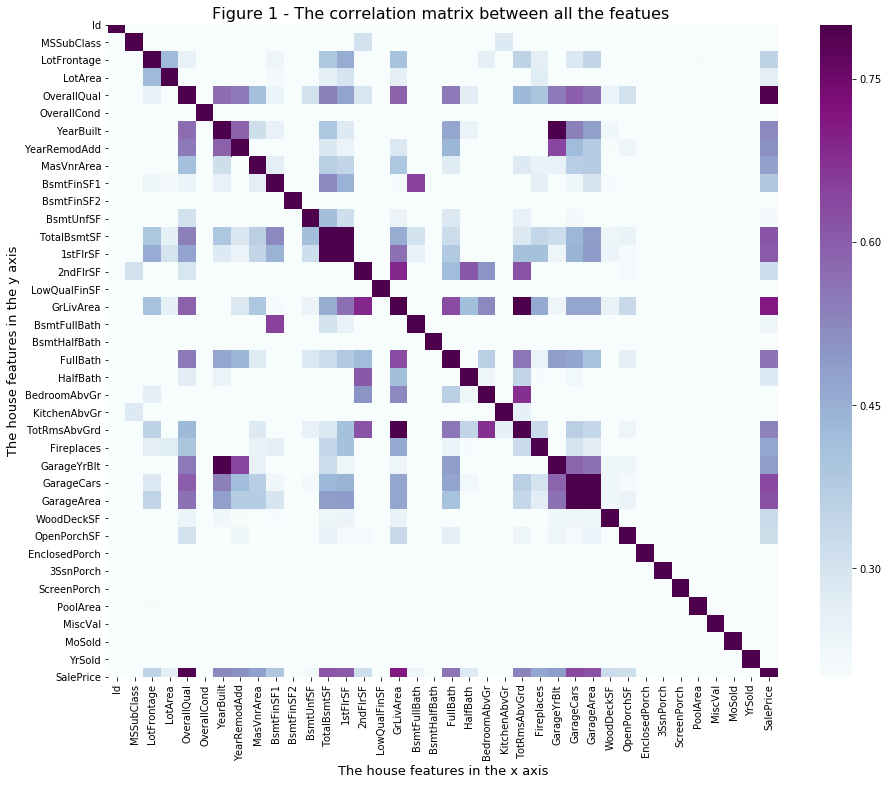

In [4]:
#for i in data_train.columns:
#    if data_train[i].isnull().any():
#        print(i,data_train[i].dtype)      

numerical_data = data_train.select_dtypes(exclude =['object'])
corr_matrix = numerical_data.corr()
f, ax = plt.subplots( figsize=(15, 12))
sns.heatmap(corr_matrix,vmin=0.2, vmax=0.8, square= True, cmap= 'BuPu')
plt.xlabel('The house features in the x axis',fontsize= 13)
plt.ylabel('The house features in the y axis',fontsize= 13)
plt.title('Figure 1 - The correlation matrix between all the featues ', fontsize= 16);
        

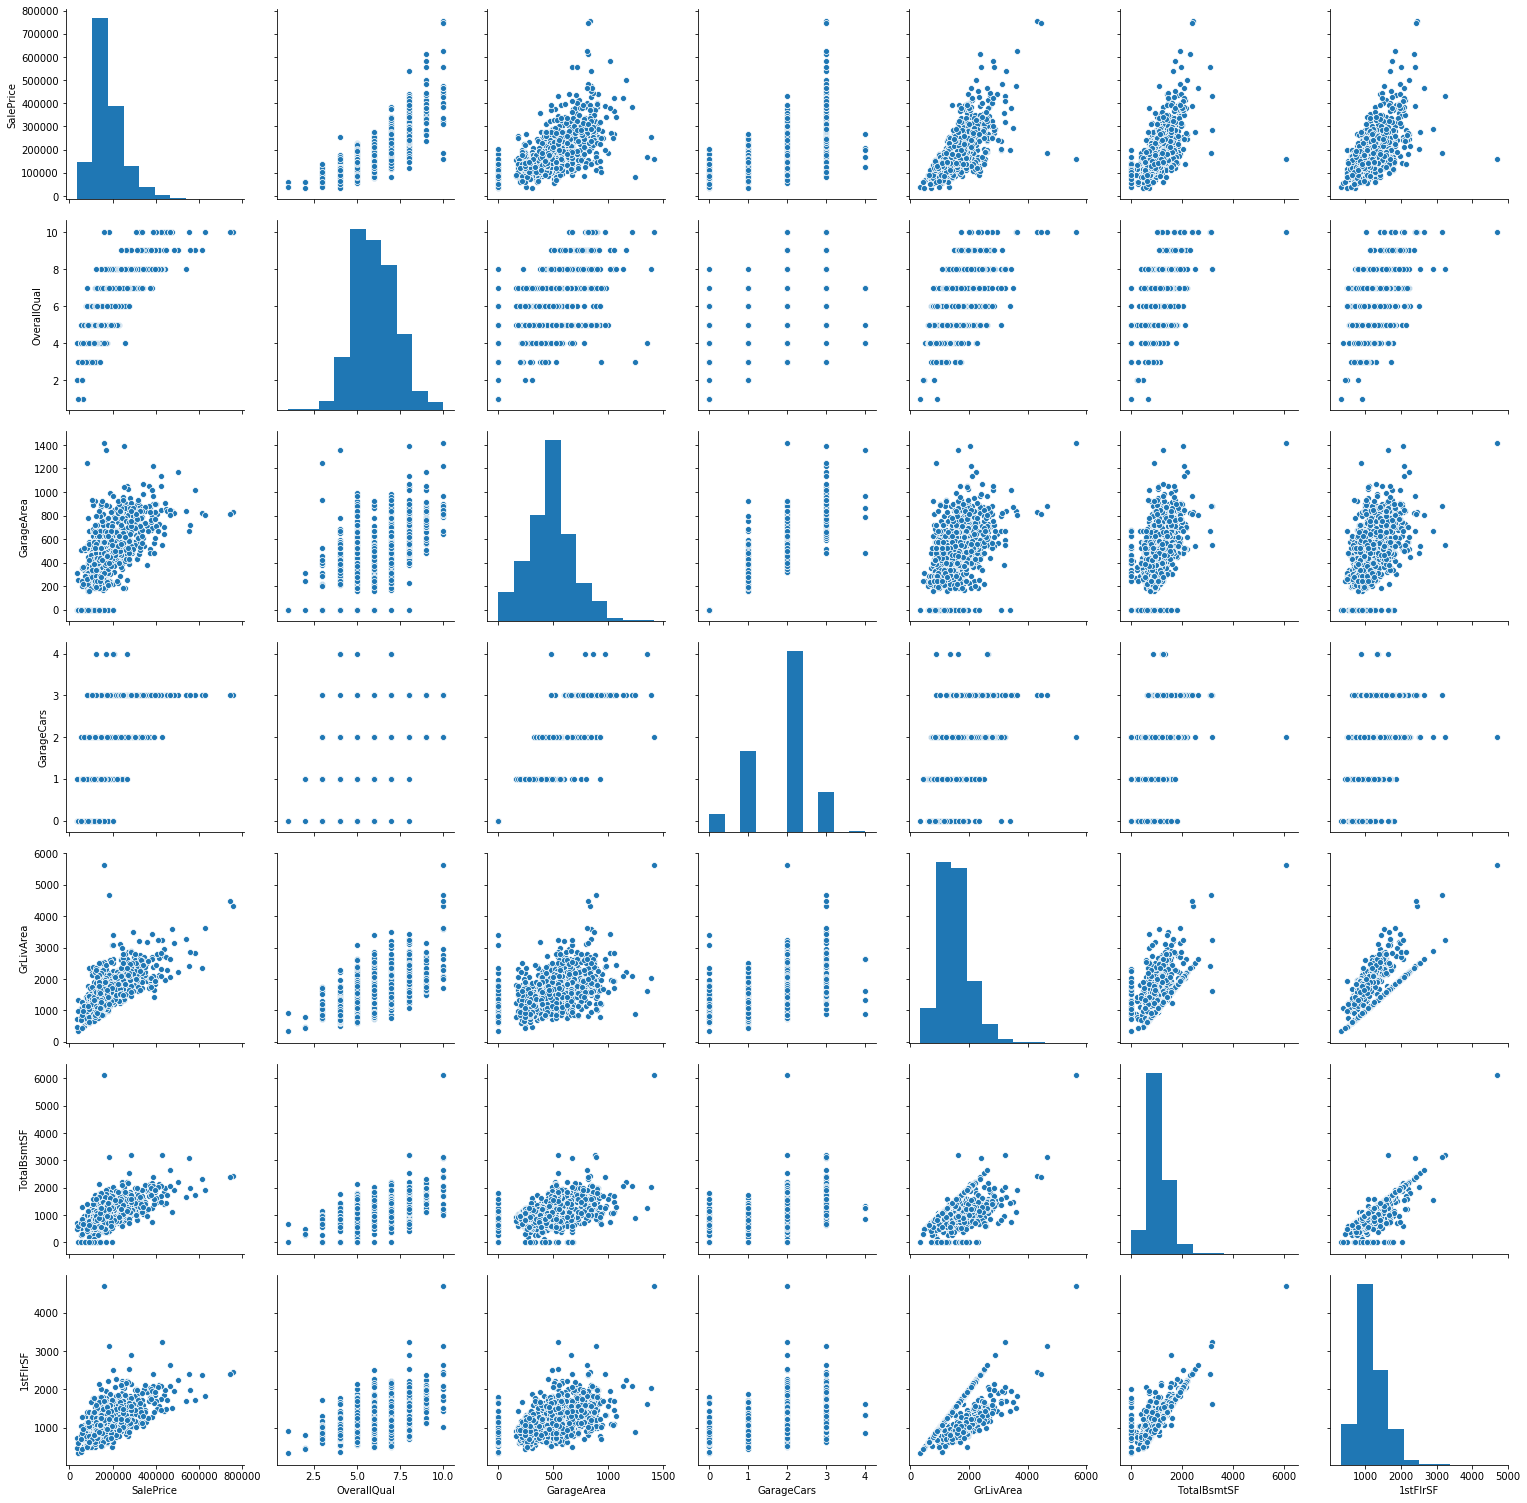

In [5]:
#['OverallQual' 'GarageCars' 'GrLivArea' 'FullBath' 'YearBuilt'
# 'GarageArea' 'TotalBsmtSF' '1stFlrSF' 'KitchenQual' 'BsmtQual']
cols =['SalePrice','OverallQual','GarageArea','GarageCars','GrLivArea','TotalBsmtSF', '1stFlrSF']

sns.pairplot(data_train[cols], size =3)

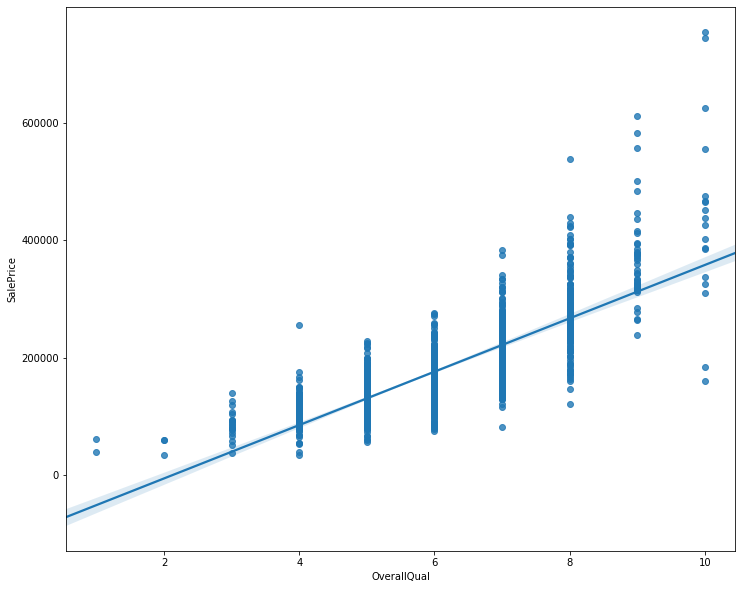

In [6]:
plt.figure(figsize =(12,10));
sns.regplot(x='OverallQual',y='SalePrice',data=data_train)

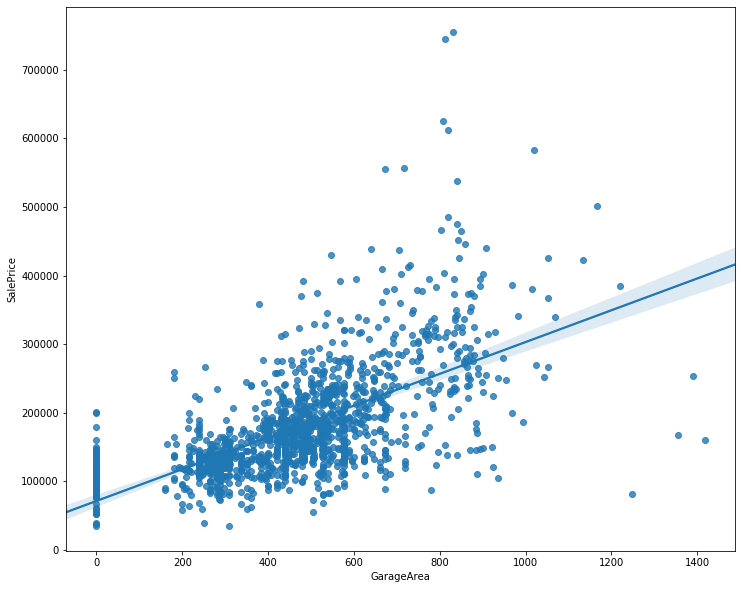

In [7]:
plt.figure(figsize =(12,10));
sns.regplot(x='GarageArea',y='SalePrice',data=data_train)

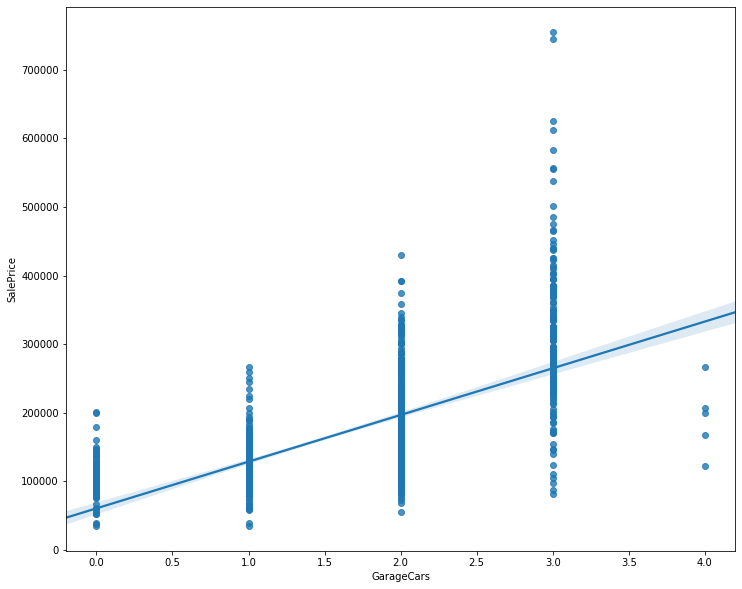

In [8]:
plt.figure(figsize =(12,10));
sns.regplot(x='GarageCars',y='SalePrice',data=data_train)

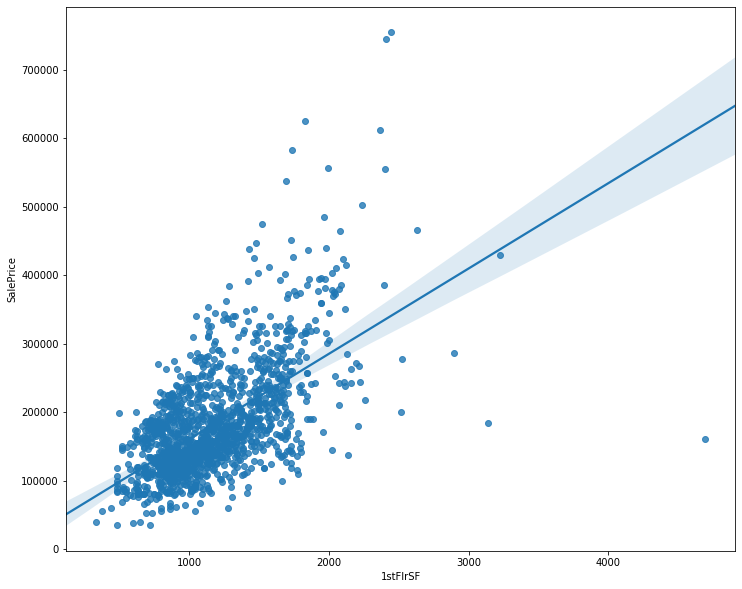

In [9]:
plt.figure(figsize =(12,10));
sns.regplot(x='1stFlrSF',y='SalePrice',data=data_train)

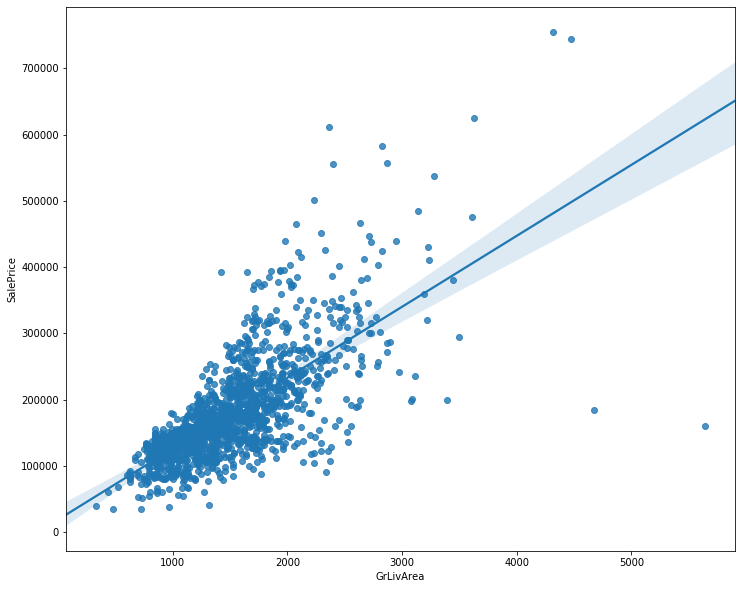

In [10]:
plt.figure(figsize =(12,10));
sns.regplot(x='GrLivArea',y='SalePrice',data=data_train)

In [11]:
g_out = data_train.sort_values(by="GrLivArea", ascending = False).head(2)
g_out

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [12]:
data_train.drop([523,1298], inplace = True)
data_train.reset_index(inplace=True)

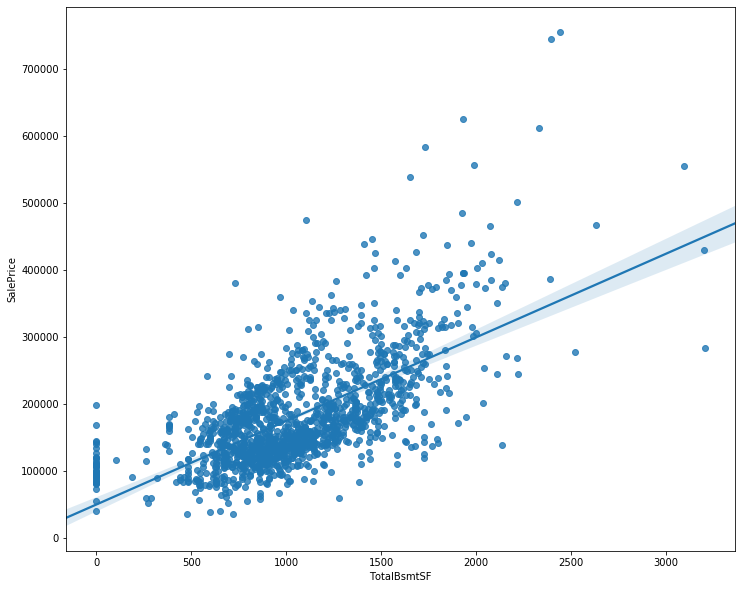

In [13]:
plt.figure(figsize =(12,10));
sns.regplot(x='TotalBsmtSF',y='SalePrice',data=data_train)

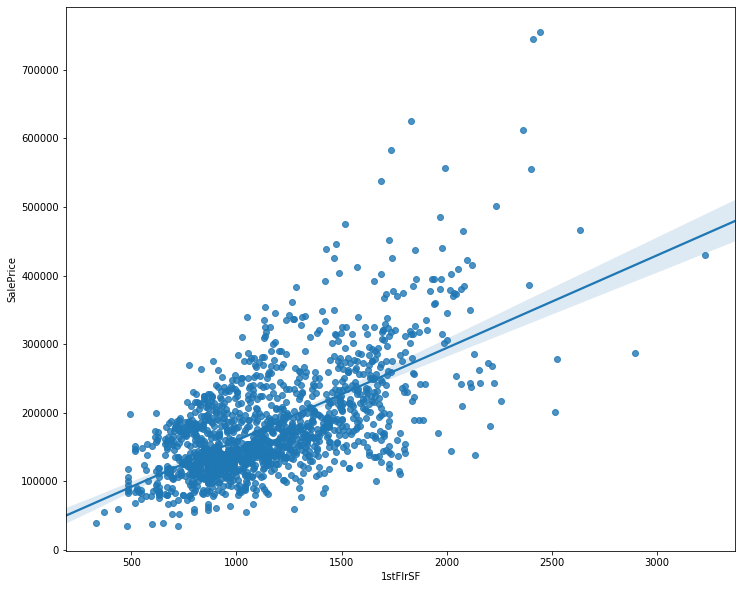

In [14]:
plt.figure(figsize =(12,10));
sns.regplot(x='1stFlrSF',y='SalePrice',data=data_train)

In [15]:
data_train.fillna(method="ffill",inplace=True)

In [16]:
arr=[]
for i in data_train.columns:
    if isinstance(i,object):
        if data_train[i].isnull().any():
            arr.append(i)
            
print(arr)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [17]:
for i in arr:
    data_train[i].fillna(inplace=True,value='No')

In [18]:
for i in data_train.columns:
    if isinstance(i,object):
        if data_train[i].isnull().any():
            print(i)

In [19]:
object_data_train=data_train.select_dtypes(include =['object'])
for i in object_data_train:
    print(i,data_train[i].unique(),"\t",len(data_train[i].unique()),"\n")

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH'] 	 5 

Street ['Pave' 'Grvl'] 	 2 

Alley ['No' 'Grvl' 'Pave'] 	 3 

LotShape ['Reg' 'IR1' 'IR2' 'IR3'] 	 4 

LandContour ['Lvl' 'Bnk' 'Low' 'HLS'] 	 4 

Utilities ['AllPub' 'NoSeWa'] 	 2 

LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 	 5 

LandSlope ['Gtl' 'Mod' 'Sev'] 	 3 

Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 	 25 

Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 	 9 

Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe'] 	 8 

BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 	 5 

HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 	 8 

RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 	 6 

RoofMatl ['CompShg' 'WdShngl' 'Me

In [20]:
object_data_train=data_train.select_dtypes(include =['object'])
for i in object_data_train:
    data_train[i] = data_train[i].factorize()[0]+1
    print(i,np.unique(data_train[i]))

MSZoning [1 2 3 4 5]
Street [1 2]
Alley [1 2 3]
LotShape [1 2 3 4]
LandContour [1 2 3 4]
Utilities [1 2]
LotConfig [1 2 3 4 5]
LandSlope [1 2 3]
Neighborhood [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
Condition1 [1 2 3 4 5 6 7 8 9]
Condition2 [1 2 3 4 5 6 7 8]
BldgType [1 2 3 4 5]
HouseStyle [1 2 3 4 5 6 7 8]
RoofStyle [1 2 3 4 5 6]
RoofMatl [1 2 3 4 5 6 7]
Exterior1st [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Exterior2nd [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
MasVnrType [1 2 3 4]
ExterQual [1 2 3 4]
ExterCond [1 2 3 4 5]
Foundation [1 2 3 4 5 6]
BsmtQual [1 2 3 4]
BsmtCond [1 2 3 4]
BsmtExposure [1 2 3 4]
BsmtFinType1 [1 2 3 4 5 6]
BsmtFinType2 [1 2 3 4 5 6]
Heating [1 2 3 4 5 6]
HeatingQC [1 2 3 4 5]
CentralAir [1 2]
Electrical [1 2 3 4 5]
KitchenQual [1 2 3 4]
Functional [1 2 3 4 5 6 7]
FireplaceQu [1 2 3 4 5 6]
GarageType [1 2 3 4 5 6]
GarageFinish [1 2 3]
GarageQual [1 2 3 4 5]
GarageCond [1 2 3 4 5]
PavedDrive [1 2 3]
PoolQC [1 2

In [29]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 82 columns):
index            1458 non-null int64
Id               1458 non-null int64
MSSubClass       1458 non-null int64
MSZoning         1458 non-null int64
LotFrontage      1458 non-null float64
LotArea          1458 non-null int64
Street           1458 non-null int64
Alley            1458 non-null int64
LotShape         1458 non-null int64
LandContour      1458 non-null int64
Utilities        1458 non-null int64
LotConfig        1458 non-null int64
LandSlope        1458 non-null int64
Neighborhood     1458 non-null int64
Condition1       1458 non-null int64
Condition2       1458 non-null int64
BldgType         1458 non-null int64
HouseStyle       1458 non-null int64
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
RoofStyle        1458 non-null int64
RoofMatl         1458 non-null int64
Ext

In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif

x_train = data_train.drop('SalePrice',axis=1)
y_train = data_train['SalePrice']
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
print(dfcolumns, dfscores)

                0
0           index
1              Id
2      MSSubClass
3        MSZoning
4     LotFrontage
..            ...
76        MiscVal
77         MoSold
78         YrSold
79       SaleType
80  SaleCondition

[81 rows x 1 columns]            0
0   0.930554
1   0.930554
2   0.873077
3   1.242118
4   1.205007
..       ...
76  3.758886
77  0.946210
78  1.069644
79  1.179386
80  1.467453

[81 rows x 1 columns]


In [22]:
print("\nfeatures \n")

#from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel


#Removing features with low variance
#print("Original shape: {}".format(np.shape(df.iloc[:,0:-1])))
#sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
#features = sel.fit_transform(df.iloc[:,0:-1])
#print("Shape apos Removing features with low variance {}".format(np.shape(features))) #nenhuma foi selecionada 
#print("\n")

#Tree-based feature selection

x_train = data_train.drop('SalePrice',axis=1)
y_train = data_train['SalePrice']
clf = ExtraTreesRegressor(n_estimators=20)
clf = clf.fit(x_train,y_train)
data = np.zeros((1,x_train.shape[1])) 
data = pd.DataFrame(data, columns=x_train.columns)
data.iloc[0] = clf.feature_importances_
data = data.T.sort_values(data.index[0], ascending=False).T

print("Features selected with Tree-based selection \n")
column_names = np.asarray((data.columns[0:40]))
column_revelence = np.asarray((data.iloc[:,0:40]))
print(column_names)
print("\n Relevance of each feature \n")
print(column_revelence)


features 

Features selected with Tree-based selection 

['OverallQual' 'GrLivArea' 'GarageCars' '1stFlrSF' 'FullBath' 'Foundation'
 'Fireplaces' 'TotalBsmtSF' 'YearBuilt' '2ndFlrSF' 'BsmtQual' 'GarageArea'
 'YearRemodAdd' 'BsmtFinSF1' 'KitchenQual' 'TotRmsAbvGrd' 'ExterQual'
 'CentralAir' 'LotArea' 'BedroomAbvGr' 'BsmtFullBath' 'MasVnrArea'
 'OverallCond' 'HalfBath' 'Neighborhood' 'MSZoning' 'BldgType'
 'WoodDeckSF' 'GarageType' 'MSSubClass' 'LandSlope' 'HouseStyle'
 'BsmtUnfSF' 'OpenPorchSF' 'SaleCondition' 'Fence' 'LotShape'
 'GarageFinish' 'LandContour' 'KitchenAbvGr']

 Relevance of each feature 

[[0.33924432 0.10669197 0.08038952 0.05120023 0.04491759 0.03285728
  0.02826987 0.02666023 0.02514318 0.02411584 0.02136946 0.01551033
  0.01474296 0.0146949  0.01363197 0.0115828  0.01117927 0.00849947
  0.00616323 0.00608047 0.00574888 0.00539261 0.00520069 0.00485227
  0.00381818 0.00380195 0.00372755 0.00341865 0.00323229 0.00308046
  0.0030222  0.00301431 0.00292975 0.00287514 0.0

In [23]:
print(column_names)
data_aux = pd.DataFrame(data=x_train, columns=column_names)
data_aux.to_csv('preprocessedData.csv', index=False)

['OverallQual' 'GrLivArea' 'GarageCars' '1stFlrSF' 'FullBath' 'Foundation'
 'Fireplaces' 'TotalBsmtSF' 'YearBuilt' '2ndFlrSF' 'BsmtQual' 'GarageArea'
 'YearRemodAdd' 'BsmtFinSF1' 'KitchenQual' 'TotRmsAbvGrd' 'ExterQual'
 'CentralAir' 'LotArea' 'BedroomAbvGr' 'BsmtFullBath' 'MasVnrArea'
 'OverallCond' 'HalfBath' 'Neighborhood' 'MSZoning' 'BldgType'
 'WoodDeckSF' 'GarageType' 'MSSubClass' 'LandSlope' 'HouseStyle'
 'BsmtUnfSF' 'OpenPorchSF' 'SaleCondition' 'Fence' 'LotShape'
 'GarageFinish' 'LandContour' 'KitchenAbvGr']


In [24]:
data_aux["SalePrice"] = y_train
data_aux.to_csv('preprocessedData.csv', index=False)

In [25]:
data = pd.read_csv('preprocessedData.csv')
data

,OverallQual,GrLivArea,GarageCars,1stFlrSF,FullBath,Foundation,Fireplaces,TotalBsmtSF,YearBuilt,2ndFlrSF,...,HouseStyle,BsmtUnfSF,OpenPorchSF,SaleCondition,Fence,LotShape,GarageFinish,LandContour,KitchenAbvGr,SalePrice
0,7,1710,2,856,2,1,0,856,2003,854,...,1,150,61,1,1,1,1,1,1,208500
1,6,1262,2,1262,2,2,1,1262,1976,0,...,2,284,0,1,1,1,1,1,1,181500
2,7,1786,2,920,2,1,1,920,2001,866,...,1,434,42,1,1,2,1,1,1,223500
3,7,1717,3,961,1,3,1,756,1915,756,...,1,540,35,2,1,2,2,1,1,140000
4,8,2198,3,1145,2,1,1,1145,2000,1053,...,1,490,84,1,1,2,1,1,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,6,1647,2,953,2,1,1,953,1999,694,...,1,953,40,1,3,1,1,1,1,175000
1454,6,2073,2,2073,2,2,2,1542,1978,0,...,2,589,0,1,2,1,2,1,1,210000
1455,7,2340,1,1188,2,6,2,1152,1941,1152,...,1,877,60,1,4,1,1,1,1,266500
1456,5,1078,1,1078,1,2,0,1078,1950,0,...,2,0,0,1,4,1,2,1,1,142125


In [26]:
processed_x_train = data.drop('SalePrice', axis=1)
processed_y_train = data['SalePrice']
print(processed_x_train)
print(processed_y_train)

      OverallQual  GrLivArea  GarageCars  1stFlrSF  FullBath  Foundation  \
0               7       1710           2       856         2           1   
1               6       1262           2      1262         2           2   
2               7       1786           2       920         2           1   
3               7       1717           3       961         1           3   
4               8       2198           3      1145         2           1   
...           ...        ...         ...       ...       ...         ...   
1453            6       1647           2       953         2           1   
1454            6       2073           2      2073         2           2   
1455            7       2340           1      1188         2           6   
1456            5       1078           1      1078         1           2   
1457            5       1256           1      1256         1           2   

      Fireplaces  TotalBsmtSF  YearBuilt  2ndFlrSF  ...  LandSlope  \
0              0 

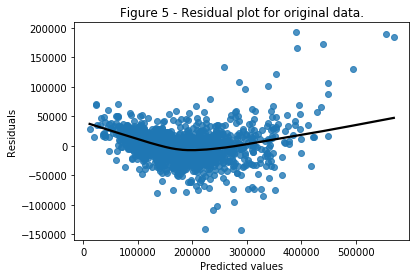

Mean square error:  740574676.0418508


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import statsmodels.api as sm

x_train = processed_x_train.copy()
y_train = processed_y_train.copy()

scaler = preprocessing.StandardScaler()
x_train_s = scaler.fit_transform(x_train)   

linear1 = LinearRegression()
linear1.fit(x_train_s, y_train)
pred = linear1.predict(x_train_s)
ax = sns.regplot(x=pred,y=y_train-pred,lowess=True,line_kws={"color":"black"})
ax.set_title('Figure 5 - Residual plot for original data.')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
plt.show();

print("Mean square error: ",sum(np.power((y_train-pred),2))/x_train.shape[0])

#results = sm.OLS(y_train,x_train_s).fit()
#print(results.summary())

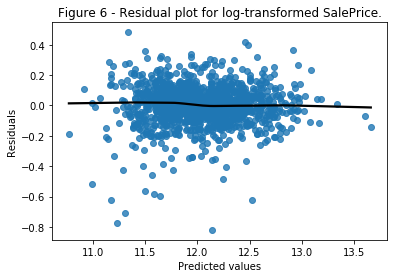

Mean square error:  0.015099778075310816


In [28]:
linear2 = LinearRegression()
linear2.fit(x_train_s, np.log1p(y_train))
pred = linear2.predict(x_train_s)
ax = sns.regplot(x=pred,y=np.log1p(y_train)-pred,lowess=True,line_kws={"color":"black"})
ax.set_title('Figure 6 - Residual plot for log-transformed SalePrice.')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
plt.show()
print("Mean square error: ",sum(np.power((np.log1p(y_train)-pred),2))/x_train.shape[0])


data_train['SalePrice'] = np.log1p(data_train.SalePrice)